In [1]:
# Standard library imports
import os  # Provides functions to interact with the operating system (e.g., file paths, directory management)

# Image processing and computer vision
import cv2  # OpenCV library for image and video processing
import numpy as np  # NumPy for numerical operations, especially arrays and matrices

# Data handling and visualization
import pandas as pd  # Pandas for data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs and visualizing data

# Machine learning utilities
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels as integers

# Deep learning with Keras (TensorFlow backend)
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers linearly
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
# Conv2D: convolutional layer for feature extraction
# MaxPooling2D: downsampling layer to reduce spatial dimensions
# Flatten: converts 2D feature maps to 1D vector
# Dense: fully connected layer
# Dropout: regularization to prevent overfitting

from tensorflow.keras.utils import to_categorical  # Converts labels to one-hot encoded format
from tensorflow.keras.callbacks import EarlyStopping  # Stops training early if validation loss doesn't improve

# Real-time hand tracking and landmark detection
import mediapipe as mp  # MediaPipe for detecting hand landmarks, useful in gesture recognition

# Miscellaneous
import random  # For generating random numbers, useful in data augmentation or shuffling
import warnings  # Python warnings module
warnings.filterwarnings('ignore')  # Suppresses warning messages for cleaner output

In [2]:

# Path to your dataset

dataset_path = r"C:\Users\Asus\OneDrive\New folder\OneDrive\New folder\HELLO PROJECT\dataset"


In [3]:
# Function to load images and their corresponding labels from a dataset directory
def load_dataset(path):
    images = []  # List to store image data
    labels = []  # List to store corresponding labels
    class_names = os.listdir(path)  # Get all class folder names in the dataset directory

    # Iterate through each class folder
    for class_name in class_names:
        class_path = os.path.join(path, class_name)  # Construct full path to the class folder

        # Check if the path is a directory (to avoid files or hidden items)
        if os.path.isdir(class_path):
            # Iterate through each image file in the class folder
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)  # Full path to the image file
                image = cv2.imread(image_path)  # Read the image using OpenCV

                if image is not None:
                    # Resize image to a consistent size (e.g., 64x64 pixels)
                    image = cv2.resize(image, (64, 64))
                    images.append(image)  # Add image data to the list
                    labels.append(class_name)  # Add corresponding label (class name)

    # Convert lists to NumPy arrays for efficient processing
    return np.array(images), np.array(labels)

In [4]:
images, labels = load_dataset(r"C:\Users\Asus\OneDrive\New folder\OneDrive\New folder\HELLO PROJECT\dataset"
)  
df = pd.DataFrame({
    'images': [img for img in images],  # Converts each image into its own row
    'labels': labels
})

In [5]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)
loss = 'sparse_categorical_crossentropy'

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    images, categorical_labels, test_size=0.2, random_state=42
)


In [7]:
X_test.shape

(480, 64, 64, 3)

In [8]:
X_train.shape

(1920, 64, 64, 3)

In [9]:
y_test.shape

(480, 6)

In [10]:
df.head(6)

,images,labels
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Bye


In [11]:
df.tail(3)

,images,labels
2397,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Yes
2398,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Yes
2399,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Yes


In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

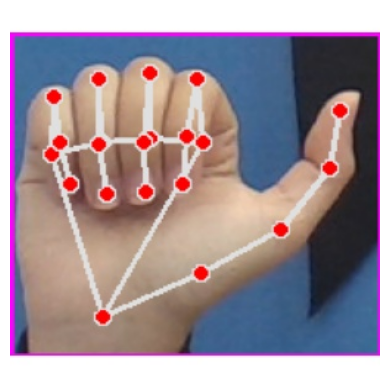

Displayed Image: Bye\Image_1667239069.7711506.jpg


In [13]:
import os

# Path to your dataset
dataset_path = r"C:\Users\Asus\OneDrive\New folder\OneDrive\New folder\HELLO PROJECT\dataset"


# Get all image file paths from all subdirectories
filenames = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            filenames.append(os.path.join(class_name, image_name))  # Store relative path

# Now you can pick a random file!
sample = random.choice(filenames)

# Load and display
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

image_path = os.path.join(dataset_path, sample)  # Full path to image
image = load_img(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()
print(f"Displayed Image: {sample}")


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_model(input_shape, num_classes):

        model = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
            BatchNormalization(),
            MaxPooling2D(),
        
            Conv2D(64, (3,3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(),
        
            Conv2D(128, (3,3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(),
        
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(6, activation='softmax')
        ])
        model.compile(optimizer='adam',loss='categorical_crossentropy',  # or sparse_categorical_crossentropy if labels are integers
        metrics=['accuracy'])
        return model
# Get input shape and number of classes
input_shape = X_train[0].shape
num_classes = len(label_encoder.classes_)

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,590 (4.87 MB)

 Trainable params: 1,275,142 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6
)

# Then safely create your list
callbacks = [early_stopping, reduce_lr]

In [16]:
callbacks

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [18]:
print(y_train.shape)  # Should be (num_samples, 6)

(1920, 6)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Then train with validation_data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.9011 - loss: 0.4720 - val_accuracy: 0.1406 - val_loss: 4.6321
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9999 - loss: 7.9785e-04 - val_accuracy: 0.3177 - val_loss: 6.6736
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9973 - loss: 0.0211 - val_accuracy: 0.3542 - val_loss: 5.4579
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 1.0000 - loss: 1.4397e-04 - val_accuracy: 0.6250 - val_loss: 4.0620
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 1.0000 - loss: 4.5038e-04 - val_accuracy: 0.6484 - val_loss: 2.7796
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 1.0000 - loss: 5.0150e-04 - val_accuracy: 0.8411 - val_loss: 1.4420
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 1.0000 - loss: 4.6030e-07 - val_accuracy: 0.9245 - val_loss: 0.2694
Epoch 8/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 1.0000 - loss: 1

In [20]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32))

48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9252 - loss: 0.7965


In [21]:
from collections import Counter
print(Counter(labels))

Counter({'Bye': 400, 'Hello': 400, 'No': 400, 'Perfect': 400, 'Thank You': 400, 'Yes': 400})


In [22]:
class_names = sorted(os.listdir(r"C:\Users\Asus\OneDrive\New folder\OneDrive\New folder\HELLO PROJECT\dataset"))
print(class_names)


['Bye', 'Hello', 'No', 'Perfect', 'Thank You', 'Yes']


In [23]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [24]:
model.save('mini_asl_project.h5')
print("mini_asl_project.h5 saved")

mini_asl_project.h5 saved


In [25]:
import cv2
import mediapipe as mp
import numpy as np
from collections import deque
from tensorflow.keras.models import load_model

# Load trained model and class labels
model = load_model('mini_asl_project.h5')
class_names = ['Bye', 'Hello', 'No', 'Perfect', 'Thank You', 'Yes']  # Must match label_encoder.classes_

# MediaPipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)

# Stabilization parameters
PREDICTION_HISTORY_SIZE = 10
MIN_CONSECUTIVE_FRAMES = 3
MIN_CONFIDENCE = 0.85
PREDICTION_DELAY = 3

# Zoom parameters
ZOOM_FACTOR = 1.5
ZOOM_SMOOTHING = 0.2

class ASLStabilizer:
    def __init__(self):
        self.prediction_history = deque(maxlen=PREDICTION_HISTORY_SIZE)
        self.current_prediction = None
        self.consecutive_count = 0
        self.frame_counter = 0

    def update_prediction(self, new_pred, new_confidence):
        self.frame_counter += 1
        if self.frame_counter % PREDICTION_DELAY != 0:
            return self.current_prediction

        if new_confidence < MIN_CONFIDENCE:
            return None

        self.prediction_history.append(new_pred)

        if len(self.prediction_history) > PREDICTION_HISTORY_SIZE // 2:
            counts = {}
            for pred in self.prediction_history:
                counts[pred] = counts.get(pred, 0) + 1
            most_common = max(counts, key=counts.get)

            if most_common == self.current_prediction:
                self.consecutive_count += 1
            else:
                self.current_prediction = most_common
                self.consecutive_count = 1

            if self.consecutive_count > 20:
                self.current_prediction = None
                self.consecutive_count = 0

            if self.consecutive_count >= MIN_CONSECUTIVE_FRAMES:
                return self.current_prediction

        return None

def apply_zoom(frame, bbox, zoom_factor, smoothing):
    if bbox is None:
        return frame

    h, w = frame.shape[:2]
    x_min, y_min, x_max, y_max = bbox

    hand_width = x_max - x_min
    hand_height = y_max - y_min

    new_width = int(hand_width * zoom_factor)
    new_height = int(hand_height * zoom_factor)

    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    x_min = max(0, center_x - new_width // 2)
    x_max = min(w, center_x + new_width // 2)
    y_min = max(0, center_y - new_height // 2)
    y_max = min(h, center_y + new_height // 2)

    if not hasattr(apply_zoom, 'last_bbox'):
        apply_zoom.last_bbox = (x_min, y_min, x_max, y_max)

    last_x_min, last_y_min, last_x_max, last_y_max = apply_zoom.last_bbox
    x_min = int(last_x_min * (1 - smoothing) + x_min * smoothing)
    y_min = int(last_y_min * (1 - smoothing) + y_min * smoothing)
    x_max = int(last_x_max * (1 - smoothing) + x_max * smoothing)
    y_max = int(last_y_max * (1 - smoothing) + y_max * smoothing)
    apply_zoom.last_bbox = (x_min, y_min, x_max, y_max)

    zoomed = frame[y_min:y_max, x_min:x_max]
    if zoomed.size > 0:
        return cv2.resize(zoomed, (w, h))
    return frame

def preprocess_hand_image(image, show_landmarks=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    hand_crop = None
    bbox = None

    if results.multi_hand_landmarks:
        if show_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        h, w = image.shape[:2]
        landmarks = results.multi_hand_landmarks[0].landmark
        x_coords = [landmark.x for landmark in landmarks]
        y_coords = [landmark.y for landmark in landmarks]

        hand_width = max(x_coords) - min(x_coords)
        hand_height = max(y_coords) - min(y_coords)
        padding = max(hand_width, hand_height) * 0.2

        x_min = max(0, int((min(x_coords) - padding) * w))
        x_max = min(w, int((max(x_coords) + padding) * w))
        y_min = max(0, int((min(y_coords) - padding) * h))
        y_max = min(h, int((max(y_coords) + padding) * h))

        bbox = (x_min, y_min, x_max, y_max)
        hand_crop = image_rgb[y_min:y_max, x_min:x_max]  # ✅ Crop from RGB image
        if hand_crop.size == 0:
            hand_crop = None

    if hand_crop is not None:
        hand_crop = cv2.resize(hand_crop, (64, 64))
        return hand_crop, bbox
    return None, None

def predict_sign(image):
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    confidence = float(np.max(predictions))
    label = class_names[int(np.argmax(predictions))]
    return label, confidence

def main():
    global ZOOM_FACTOR

    cap = cv2.VideoCapture(0)
    stabilizer = ASLStabilizer()
    show_landmarks = True

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.flip(frame, 1)
            hand_image, bbox = preprocess_hand_image(frame, show_landmarks)

            label, confidence = None, 0.0
            stabilized_pred = None

            if hand_image is not None and hand_image.shape == (64, 64, 3):
                label, confidence = predict_sign(hand_image)
                stabilized_pred = stabilizer.update_prediction(label, confidence)

            if stabilized_pred:
                text = f"{stabilized_pred} ({confidence:.2f})"
                cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                zoomed_frame = apply_zoom(frame, bbox, ZOOM_FACTOR, ZOOM_SMOOTHING)
                cv2.putText(zoomed_frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.imshow('Zoomed View', zoomed_frame)

            cv2.imshow('ASL Detection', frame)

            key = cv2.waitKey(1)
            if key & 0xFF == ord('q'):
                break
            elif key & 0xFF == ord('l'):
                show_landmarks = not show_landmarks
            elif key & 0xFF == ord('z'):
                ZOOM_FACTOR = min(3.0, ZOOM_FACTOR + 0.1)
            elif key & 0xFF == ord('x'):
                ZOOM_FACTOR = max(1.0, ZOOM_FACTOR - 0.1)

    finally:
        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()
import cv2
import mediapipe as mp
import numpy as np
from collections import deque
from tensorflow.keras.models import load_model

# Load trained model and class labels
model = load_model('mini_asl_project.h5')
class_names = ['Bye', 'Hello', 'No', 'Perfect', 'Thank You', 'Yes']  # Must match label_encoder.classes_

# MediaPipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)

# Stabilization parameters
PREDICTION_HISTORY_SIZE = 10
MIN_CONSECUTIVE_FRAMES = 3
MIN_CONFIDENCE = 0.85
PREDICTION_DELAY = 3

# Zoom parameters
ZOOM_FACTOR = 1.5
ZOOM_SMOOTHING = 0.2

class ASLStabilizer:
    def __init__(self):
        self.prediction_history = deque(maxlen=PREDICTION_HISTORY_SIZE)
        self.current_prediction = None
        self.consecutive_count = 0
        self.frame_counter = 0

    def update_prediction(self, new_pred, new_confidence):
        self.frame_counter += 1
        if self.frame_counter % PREDICTION_DELAY != 0:
            return self.current_prediction

        if new_confidence < MIN_CONFIDENCE:
            return None

        self.prediction_history.append(new_pred)

        if len(self.prediction_history) > PREDICTION_HISTORY_SIZE // 2:
            counts = {}
            for pred in self.prediction_history:
                counts[pred] = counts.get(pred, 0) + 1
            most_common = max(counts, key=counts.get)

            if most_common == self.current_prediction:
                self.consecutive_count += 1
            else:
                self.current_prediction = most_common
                self.consecutive_count = 1

            if self.consecutive_count > 20:
                self.current_prediction = None
                self.consecutive_count = 0

            if self.consecutive_count >= MIN_CONSECUTIVE_FRAMES:
                return self.current_prediction

        return None

def apply_zoom(frame, bbox, zoom_factor, smoothing):
    if bbox is None:
        return frame

    h, w = frame.shape[:2]
    x_min, y_min, x_max, y_max = bbox

    hand_width = x_max - x_min
    hand_height = y_max - y_min

    new_width = int(hand_width * zoom_factor)
    new_height = int(hand_height * zoom_factor)

    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    x_min = max(0, center_x - new_width // 2)
    x_max = min(w, center_x + new_width // 2)
    y_min = max(0, center_y - new_height // 2)
    y_max = min(h, center_y + new_height // 2)

    if not hasattr(apply_zoom, 'last_bbox'):
        apply_zoom.last_bbox = (x_min, y_min, x_max, y_max)

    last_x_min, last_y_min, last_x_max, last_y_max = apply_zoom.last_bbox
    x_min = int(last_x_min * (1 - smoothing) + x_min * smoothing)
    y_min = int(last_y_min * (1 - smoothing) + y_min * smoothing)
    x_max = int(last_x_max * (1 - smoothing) + x_max * smoothing)
    y_max = int(last_y_max * (1 - smoothing) + y_max * smoothing)
    apply_zoom.last_bbox = (x_min, y_min, x_max, y_max)

    zoomed = frame[y_min:y_max, x_min:x_max]
    if zoomed.size > 0:
        return cv2.resize(zoomed, (w, h))
    return frame

def preprocess_hand_image(image, show_landmarks=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    hand_crop = None
    bbox = None

    if results.multi_hand_landmarks:
        if show_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        h, w = image.shape[:2]
        landmarks = results.multi_hand_landmarks[0].landmark
        x_coords = [landmark.x for landmark in landmarks]
        y_coords = [landmark.y for landmark in landmarks]

        hand_width = max(x_coords) - min(x_coords)
        hand_height = max(y_coords) - min(y_coords)
        padding = max(hand_width, hand_height) * 0.2

        x_min = max(0, int((min(x_coords) - padding) * w))
        x_max = min(w, int((max(x_coords) + padding) * w))
        y_min = max(0, int((min(y_coords) - padding) * h))
        y_max = min(h, int((max(y_coords) + padding) * h))

        bbox = (x_min, y_min, x_max, y_max)
        hand_crop = image_rgb[y_min:y_max, x_min:x_max]  # ✅ Crop from RGB image
        if hand_crop.size == 0:
            hand_crop = None

    if hand_crop is not None:
        hand_crop = cv2.resize(hand_crop, (64, 64))
        return hand_crop, bbox
    return None, None

def predict_sign(image):
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    confidence = float(np.max(predictions))
    label = class_names[int(np.argmax(predictions))]
    return label, confidence

def main():
    global ZOOM_FACTOR

    cap = cv2.VideoCapture(0)
    stabilizer = ASLStabilizer()
    show_landmarks = True

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.flip(frame, 1)
            hand_image, bbox = preprocess_hand_image(frame, show_landmarks)

            label, confidence = None, 0.0
            stabilized_pred = None

            if hand_image is not None and hand_image.shape == (64, 64, 3):
                label, confidence = predict_sign(hand_image)
                stabilized_pred = stabilizer.update_prediction(label, confidence)

            if stabilized_pred:
                text = f"{stabilized_pred} ({confidence:.2f})"
                cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                zoomed_frame = apply_zoom(frame, bbox, ZOOM_FACTOR, ZOOM_SMOOTHING)
                cv2.putText(zoomed_frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.imshow('Zoomed View', zoomed_frame)

            cv2.imshow('ASL Detection', frame)

            key = cv2.waitKey(1)
            if key & 0xFF == ord('q'):
                break
            elif key & 0xFF == ord('l'):
                show_landmarks = not show_landmarks
            elif key & 0xFF == ord('z'):
                ZOOM_FACTOR = min(3.0, ZOOM_FACTOR + 0.1)
            elif key & 0xFF == ord('x'):
                ZOOM_FACTOR = max(1.0, ZOOM_FACTOR - 0.1)

    finally:
        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
